In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import eli5
import os


from eli5.sklearn import PermutationImportance
pd.set_option('display.max_columns', None)
os.environ["PATH"] += os.pathsep + 'C:/Users/98066/Downloads/graphviz-2.38/release/bin/'

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')

In [2]:
# Read file and output the first 5 item
df=pd.read_csv('D:/csc503/fifa19/data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Data Preprocessing

In [3]:
#output all attributes of a football player
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
# drop column "Unnamed: 0" which is not useful
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
#show information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

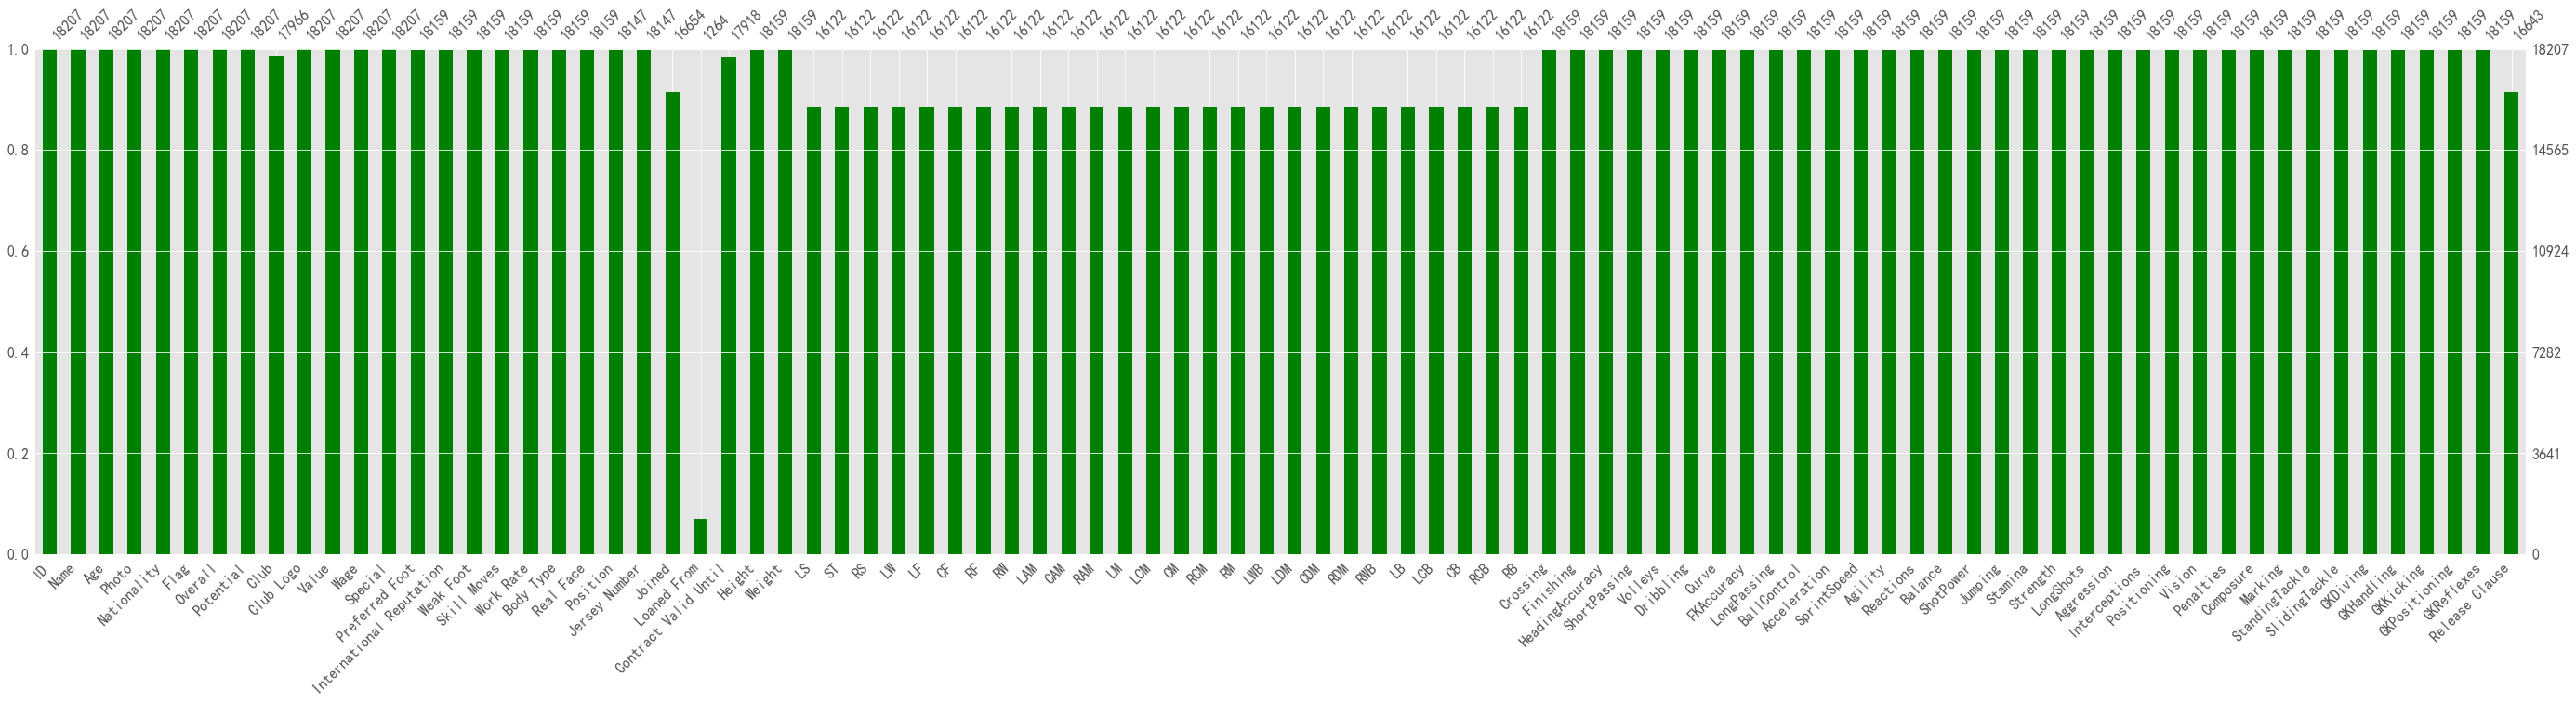

In [6]:
msno.bar(df.sample(18207),(48,10),labels=True,color='green')

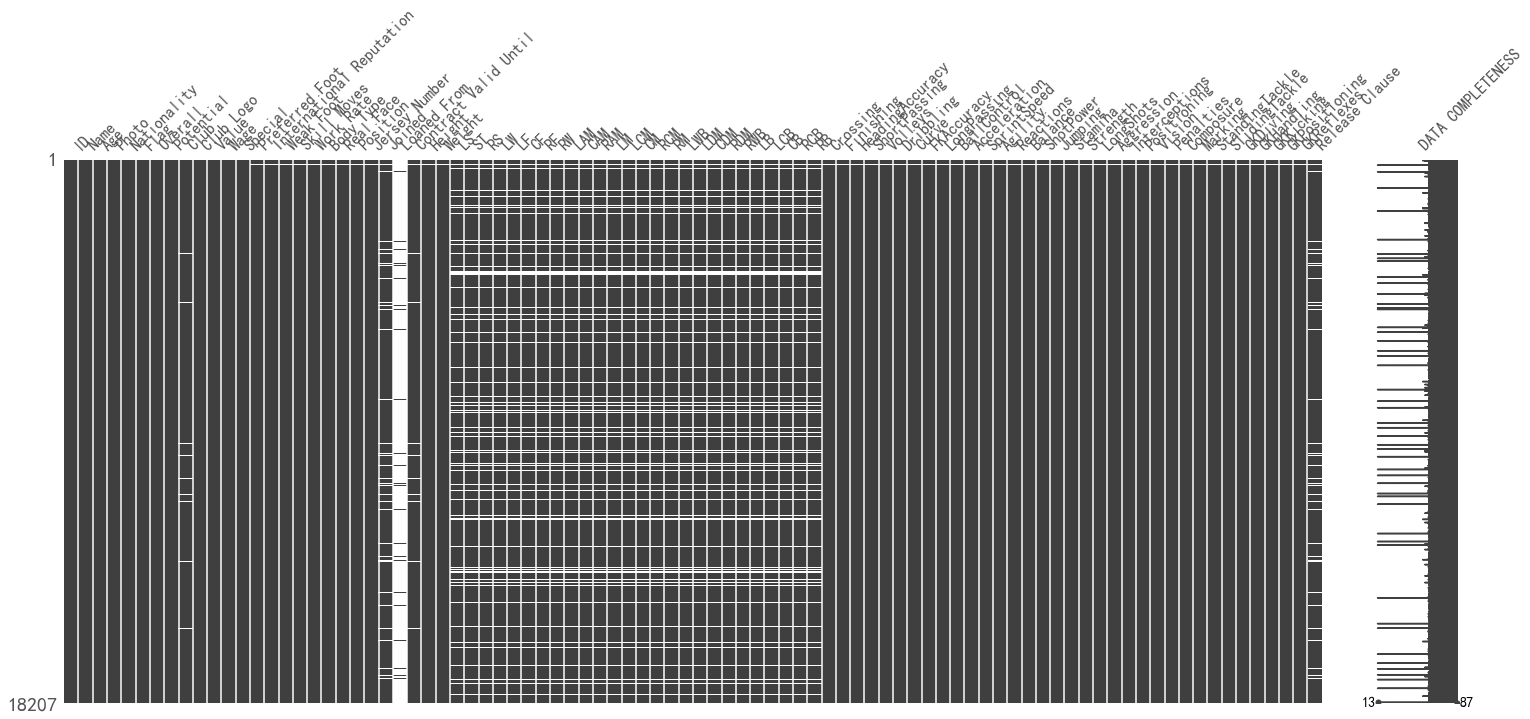

In [7]:
msno.matrix(df.sample( 18207 ),(58,10),labels=True)

In [8]:
#drop the column with little data
df.drop(['Loaned From'],axis=1,inplace=True)

In [9]:
#show 20 players 
df.head(20)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,

In [10]:
#Cleaning some of values so that we can interpret them 
def valueunitize(df_value):
    try:
        value = float(df_value[1:-1])
        unit = df_value[-1:]

        if unit == 'M':
            value = value * 1000000
        elif unit == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(valueunitize)
df['Wage'] = df['Wage'].apply(valueunitize)

In [11]:
df.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,93000000.0,340000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,

## Data Visualization Analysis

In [12]:
#print number of clubs
print('Total Number of Clubs:{0}'.format(df['Club'].nunique()))

Total Number of Clubs:651


In [13]:
#print number of players of each club
print(df['Club'].value_counts())

TSG 1899 Hoffenheim          33
CD Leganés                   33
FC Barcelona                 33
Fortuna Düsseldorf           33
Everton                      33
RC Celta                     33
Burnley                      33
Southampton                  33
Frosinone                    33
Atlético Madrid              33
AS Monaco                    33
Eintracht Frankfurt          33
Rayo Vallecano               33
Borussia Dortmund            33
Tottenham Hotspur            33
Wolverhampton Wanderers      33
Chelsea                      33
Liverpool                    33
Arsenal                      33
Empoli                       33
Valencia CF                  33
Cardiff City                 33
Real Madrid                  33
Manchester City              33
Manchester United            33
Newcastle United             33
VfL Wolfsburg                32
Lazio                        32
Crystal Palace               32
Huddersfield Town            32
                             ..
IFK Göte

In [14]:
#print number of countries
print('Total Number of Clubs:{0}'.format(df['Nationality'].nunique()))

Total Number of Clubs:164


In [15]:
#print number of players of each country
print(df['Nationality'].value_counts())

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Philippines                2
Hong Kong                  2
Uzbekistan                 2
Nicaragua     

In [16]:
#print basic information of the player with the maximum overall ability and basic information of the player with the minumum overall ability
print('maximum overall ability:\n'+str(df.loc[df['Overall'].idxmax()][1:5]))
print('minimum overall ability:\n'+str(df.loc[df['Overall'].idxmin()][1:5]))

maximum overall ability:
Name                                                 L. Messi
Age                                                        31
Photo          https://cdn.sofifa.org/players/4/19/158023.png
Nationality                                         Argentina
Name: 0, dtype: object
minimum overall ability:
Name                                                G. Nugent
Age                                                        16
Photo          https://cdn.sofifa.org/players/4/19/246269.png
Nationality                                           England
Name: 18206, dtype: object


In [17]:
#print the names of players with different highest ability
abilities=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
for index in range(len(abilities)):
    print('Best {0}:{1}'.format(abilities[index],df.loc[df[abilities[index]].idxmax()][1]))

Best Crossing:K. De Bruyne
Best Finishing:L. Messi
Best HeadingAccuracy:Naldo
Best ShortPassing:L. Modrić
Best Volleys:E. Cavani
Best Dribbling:L. Messi
Best Curve:Quaresma
Best FKAccuracy:L. Messi
Best LongPassing:T. Kroos
Best BallControl:L. Messi
Best Acceleration:Douglas Costa
Best SprintSpeed:K. Mbappé
Best Agility:Neymar Jr
Best Reactions:Cristiano Ronaldo
Best Balance:Bernard
Best ShotPower:Cristiano Ronaldo
Best Jumping:Cristiano Ronaldo
Best Stamina:N. Kanté
Best Strength:A. Akinfenwa
Best LongShots:L. Messi
Best Aggression:B. Pearson
Best Interceptions:N. Kanté
Best Positioning:Cristiano Ronaldo
Best Vision:L. Messi
Best Penalties:M. Balotelli
Best Composure:L. Messi
Best Marking:A. Barzagli
Best StandingTackle:G. Chiellini
Best SlidingTackle:Sergio Ramos
Best GKDiving:De Gea
Best GKHandling:J. Oblak
Best GKKicking:M. Neuer
Best GKPositioning:G. Buffon
Best GKReflexes:De Gea


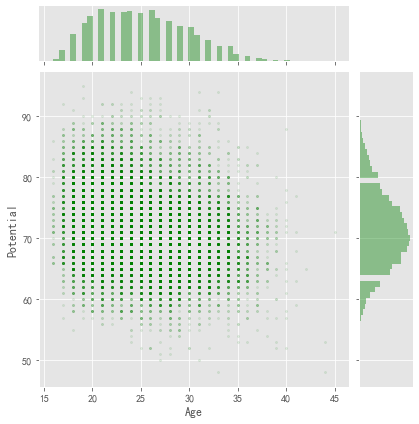

In [18]:
#the ralationship between potential and age
sns.jointplot(x=df['Age'],y=df['Potential'],joint_kws={'alpha':0.1,'s':5,'color':'green'},marginal_kws={'color':'green'})

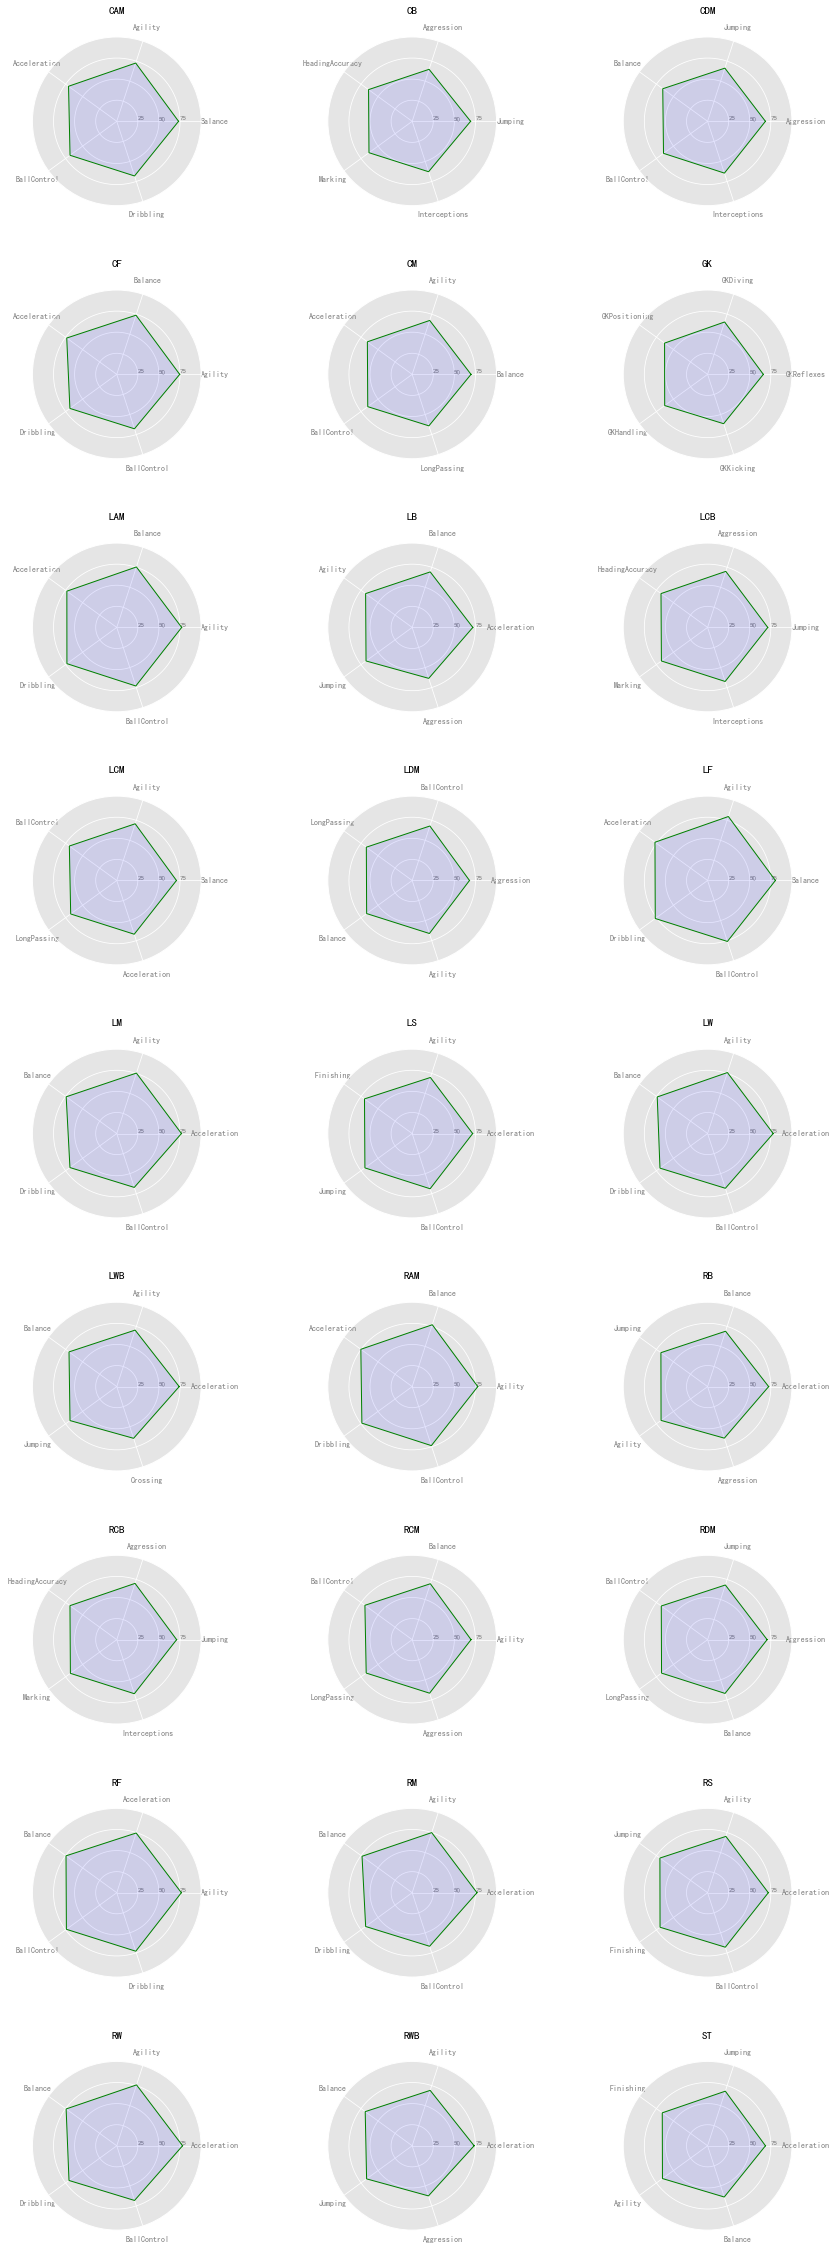

In [19]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='green')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

In [21]:
#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM') | (df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW') | (df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'MF'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position
    
df1 = df.copy()
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)

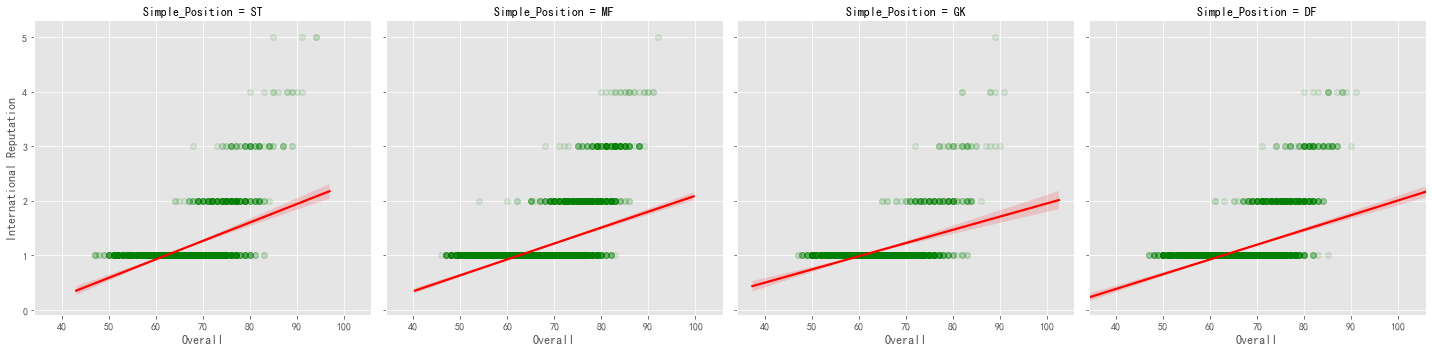

In [22]:
# The relationship between 'Overall' and 'International Reputation' of players in different positions
sns.lmplot(x = 'Overall', y = 'International Reputation', data = df1,col='Simple_Position',scatter_kws = {'alpha':0.1,'color':'green'},
           line_kws={'color':'red'})

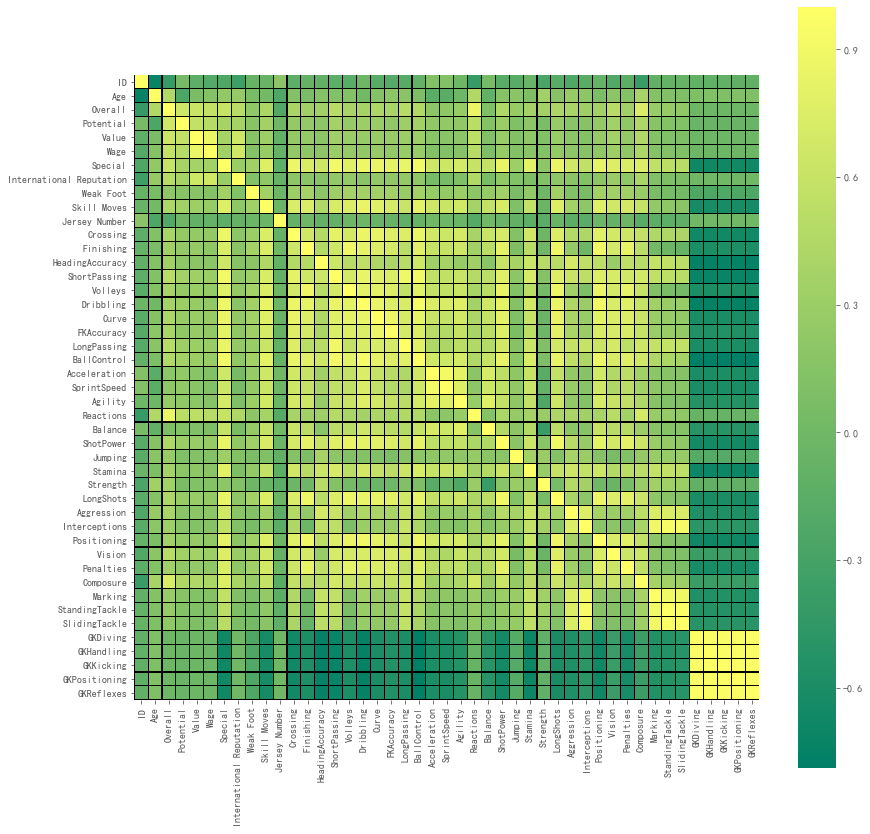

In [23]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),linewidths=0.1,linecolor='black',square=True,cmap='summer')

#The correlation among the goalkeeping side with other columns is the lowest and the correlation among themselves is high
#the correlation between Dribbling, Volleys, BallControl etc is high

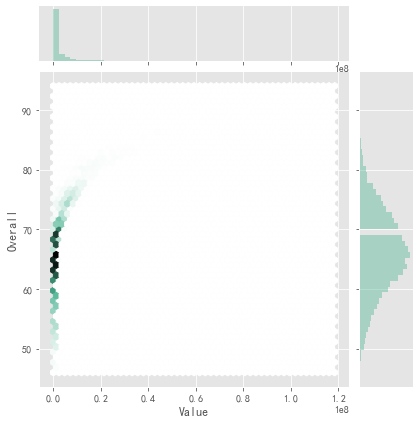

In [54]:
sns.jointplot(x=df['Value'], y=df['Overall'], kind="hex", color="#4CB392");

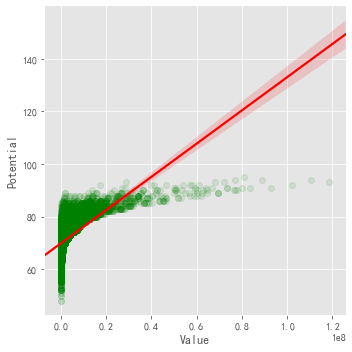

In [25]:
sns.lmplot(x = 'Value', y = 'Potential', data = df,scatter_kws = {'alpha':0.1,'color':'green'},
           line_kws={'color':'red'})

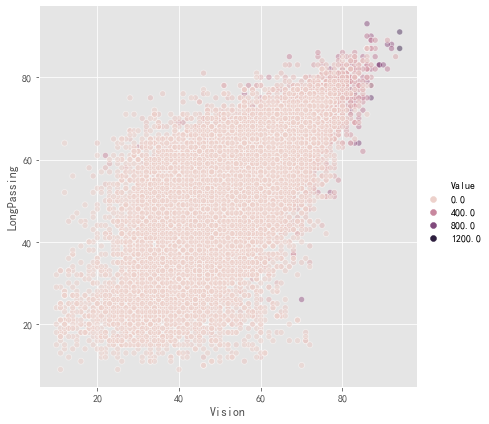

In [26]:
# The relationship between 'LongPassing' and 'Vision' of players with different value
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Vision", y="LongPassing", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

## Modelling and Data Mining

In [28]:
def simple_position1(df):
    if ((df['Position'] == 'RB') | (df['Position'] == 'LB')  | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'Full-Back'
    elif((df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB')):
        return 'Central-Back'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM') | (df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW') | (df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'MF'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position
    
df2 = df.copy()
df2['Position'] = df1.apply(simple_position1,axis = 1)

In [29]:
#split the Work Rate column into two columns
workrate=df2['Work Rate'].str.split("/",n=1,expand=True)
df2['Work Rate1']=workrate[0]
df2['Work Rate2']=workrate[1]
df2=df2.drop(['Work Rate'],axis=1)
df2.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Work Rate1,Work Rate2
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Messi,Yes,ST,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Medium,Medium
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,High,Low
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,Neymar,Yes,MF,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,High,Medium
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,Medium,Medium
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,Normal,Yes,MF,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,High,High


In [30]:
#drop unnecessary values for predicting Overall
drop_cols = df2.columns[25:51]
df2 = df2.drop(drop_cols, axis = 1)
df4 = df2.copy()
df2 = df2.drop(['ID','Photo','Flag','Real Face','Preferred Foot','Nationality','Club Logo','Joined','Special','Body Type', 'Release Clause',
               'Contract Valid Until','Height','Weight','Wage','Value','Name','Club'], axis = 1)
df2 = df2.dropna()
df2.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Work Rate1,Work Rate2
0,31,94,94,5.0,4.0,4.0,ST,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,Medium,Medium
1,33,94,94,5.0,4.0,5.0,ST,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,High,Low
2,26,92,93,5.0,5.0,5.0,MF,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,High,Medium
3,27,91,93,4.0,3.0,1.0,GK,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Medium,Medium
4,27,91,92,4.0,5.0,4.0,MF,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,High,High


In [31]:
#split Overall as target
target=df2.Overall
df3=df2.drop(['Overall'],axis=1)

#split trainning set and test set
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(df3,target,test_size=0.2)

#One Hot Encoding
X1_train = pd.get_dummies(X1_train)
X1_test = pd.get_dummies(X1_test)
print(X1_test.shape,X1_train.shape)
print(y1_test.shape,y1_train.shape)
X1_test.head()

(3630, 51) (14517, 51)
(3630,) (14517,)


,Age,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position_Central-Back,Position_Full-Back,Position_GK,Position_MF,Position_ST,Work Rate1_High,Work Rate1_Low,Work Rate1_Medium,Work Rate2_ High,Work Rate2_ Low,Work Rate2_ Medium
11021,20,77,1.0,3.0,3.0,10.0,64.0,62.0,38.0,64.0,45.0,68.0,59.0,67.0,60.0,68.0,63.0,71.0,72.0,59.0,65.0,46.0,53.0,53.0,71.0,55.0,42.0,56.0,62.0,70.0,55.0,60.0,55.0,56.0,50.0,8.0,9.0,7.0,12.0,14.0,0,0,0,1,0,0,0,1,0,0,1
9249,27,66,1.0,4.0,3.0,70.0,64.0,65.0,61.0,63.0,50.0,66.0,61.0,68.0,60.0,67.0,75.0,80.0,70.0,63.0,70.0,75.0,68.0,61.0,57.0,64.0,58.0,22.0,66.0,58.0,67.0,64.0,34.0,21.0,18.0,8.0,9.0,15.0,13.0,14.0,0,0,0,1,0,0,0,1,0,0,1
8157,25,71,1.0,3.0,2.0,20.0,40.0,24.0,66.0,63.0,32.0,39.0,36.0,46.0,62.0,60.0,56.0,51.0,57.0,59.0,56.0,58.0,73.0,65.0,72.0,26.0,72.0,66.0,38.0,46.0,41.0,61.0,63.0,67.0,68.0,8.0,14.0,14.0,15.0,6.0,1,0,0,0,0,0,0,1,0,0,1
50,31,87,3.0,4.0,4.0,14.0,77.0,86.0,35.0,82.0,70.0,91.0,82.0,79.0,74.0,89.0,93.0,85.0,94.0,88.0,92.0,80.0,60.0,75.0,42.0,81.0,59.0,36.0,87.0,83.0,79.0,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,0,0,0,0,1,1,0,0,0,1,0
13532,24,69,1.0,2.0,1.0,1.0,12.0,12.0,14.0,21.0,15.0,11.0,13.0,15.0,20.0,22.0,51.0,48.0,56.0,50.0,58.0,21.0,59.0,30.0,49.0,13.0,39.0,15.0,12.0,49.0,18.0,49.0,10.0,15.0,11.0,65.0,58.0,58.0,61.0,66.0,0,0,1,0,0,0,0,1,0,0,1


In [32]:
#apply linear regression
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X1_train,y1_train)
prediction=model1.predict(X1_test)

from sklearn.metrics import r2_score,mean_squared_error
print('r2 score:'+str(r2_score(y1_test,prediction)))
print('RMSE:'+str(np.sqrt(mean_squared_error(y1_test,prediction))))

r2 score:0.9358140955409328
RMSE:1.7700453314202542


In [33]:
#input attributes and predict Overall ability
DataH1=pd.DataFrame([['19','100','1.0','3.0','4.0','22','50','36','44','40','32','52','40','38','47','43','55','57','51','46','45','32','48','53',
                      '45','38','52','37','52','57','43','41','45','20','21','15','5','6','5','4','0','0','0','0','1','0','0','1','0','0','1']])
predictOverall=model1.predict(DataH1)
print(predictOverall)

[68.21074587]


In [34]:
#show the importance of different features
perm = PermutationImportance(model1, random_state=1).fit(X1_test, y1_test)
eli5.show_weights(perm, feature_names = X1_test.columns.tolist())

Weight,Feature
0.3358 ± 0.0214,Potential
0.1714 ± 0.0060,Age
0.0760 ± 0.0051,BallControl
0.0753 ± 0.0034,Reactions
0.0483 ± 0.0035,GKReflexes
0.0360 ± 0.0023,GKDiving
0.0227 ± 0.0022,ShortPassing
0.0224 ± 0.0013,HeadingAccuracy
0.0217 ± 0.0023,GKHandling
0.0183 ± 0.0019,Position_Central-Back


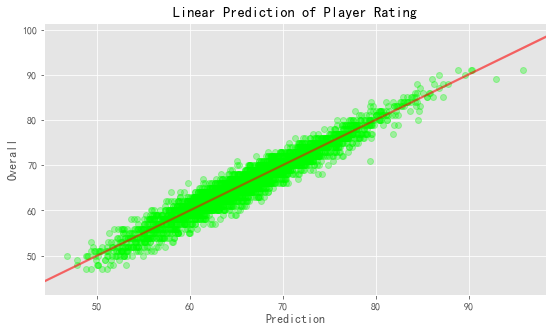

In [35]:
#Visualising the results
plt.figure(figsize=(9,5))
sns.regplot(prediction,y1_test,scatter_kws={'alpha':0.3,'color':'lime'},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Prediction')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

In [36]:
#drop unnecessary values for predicting Value
df4 = df4.drop(['ID','Photo','Flag','Real Face','Preferred Foot','Nationality','Club Logo','Wage','Joined','Special','Body Type','Height','Weight','Name','Club','Release Clause','Contract Valid Until'], axis = 1)
df4 = df4.dropna()
df4.head()

,Age,Overall,Potential,Value,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Work Rate1,Work Rate2
0,31,94,94,110500000.0,5.0,4.0,4.0,ST,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,Medium,Medium
1,33,94,94,77000000.0,5.0,4.0,5.0,ST,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,High,Low
2,26,92,93,118500000.0,5.0,5.0,5.0,MF,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,High,Medium
3,27,91,93,72000000.0,4.0,3.0,1.0,GK,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Medium,Medium
4,27,91,92,102000000.0,4.0,5.0,4.0,MF,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,High,High


In [37]:
#split Value as target
target=df4.Value
df5=df4.drop(['Value'],axis=1)

#split trainning set and test set
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(df5,target,test_size=0.2)

#One Hot Encoding
X2_train = pd.get_dummies(X2_train)
X2_test = pd.get_dummies(X2_test)
print(X2_test.shape,X2_train.shape)
print(y2_test.shape,y2_train.shape)
X2_test.head()

(3630, 52) (14517, 52)
(3630,) (14517,)


,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position_Central-Back,Position_Full-Back,Position_GK,Position_MF,Position_ST,Work Rate1_High,Work Rate1_Low,Work Rate1_Medium,Work Rate2_ High,Work Rate2_ Low,Work Rate2_ Medium
10216,27,65,65,1.0,2.0,3.0,28.0,68.0,44.0,59.0,59.0,31.0,64.0,37.0,38.0,58.0,62.0,74.0,75.0,76.0,62.0,82.0,42.0,61.0,64.0,54.0,32.0,70.0,64.0,57.0,60.0,57.0,60.0,64.0,65.0,60.0,12.0,10.0,13.0,8.0,9.0,0,1,0,0,0,1,0,0,0,0,1
5635,26,70,70,1.0,3.0,2.0,19.0,35.0,37.0,77.0,48.0,43.0,36.0,33.0,45.0,53.0,68.0,48.0,44.0,38.0,75.0,39.0,57.0,42.0,52.0,83.0,42.0,66.0,74.0,28.0,39.0,51.0,60.0,67.0,68.0,73.0,8.0,9.0,11.0,11.0,10.0,1,0,0,0,0,0,0,1,0,0,1
9344,21,66,75,1.0,3.0,2.0,45.0,57.0,33.0,63.0,61.0,28.0,59.0,29.0,41.0,56.0,64.0,71.0,78.0,50.0,63.0,56.0,55.0,75.0,75.0,82.0,41.0,65.0,64.0,39.0,40.0,42.0,55.0,60.0,65.0,61.0,12.0,13.0,11.0,15.0,10.0,0,1,0,0,0,0,0,1,0,0,1
15441,17,59,74,1.0,2.0,2.0,39.0,41.0,40.0,54.0,63.0,49.0,60.0,45.0,44.0,59.0,64.0,67.0,64.0,60.0,57.0,67.0,66.0,56.0,60.0,49.0,56.0,60.0,47.0,59.0,48.0,50.0,54.0,62.0,56.0,60.0,13.0,6.0,14.0,9.0,13.0,0,0,0,1,0,1,0,0,1,0,0
13956,23,61,68,1.0,3.0,1.0,20.0,20.0,20.0,16.0,29.0,9.0,12.0,15.0,13.0,27.0,22.0,42.0,42.0,30.0,56.0,60.0,18.0,56.0,31.0,63.0,19.0,25.0,21.0,20.0,35.0,16.0,43.0,11.0,12.0,19.0,61.0,61.0,60.0,60.0,62.0,0,0,1,0,0,0,0,1,0,0,1


In [38]:
#apply linear regression
model2=LinearRegression()
model2.fit(X2_train,y2_train)
prediction=model2.predict(X2_test)
from sklearn.metrics import r2_score,mean_squared_error
print('r2 score:'+str(r2_score(y2_test,prediction)))
print('RMSE:'+str(np.sqrt(mean_squared_error(y2_test,prediction))))

r2 score:0.6357794268879248
RMSE:3431523.0246484205


In [39]:
#input features and predict Value
DataH2=pd.DataFrame([['19','68','100','1.0','3.0','4.0','22','50','36','44','40','32','52','40','38','47','43','55','57','51','46','45','32','48','53','45','38','52','37','52','57','43','41','45','20','21','15','5','6','5','4','0','0','0','0','1','0','0','1','0','0','1']])
predictValue=model2.predict(DataH2)
print(predictValue)

[4449109.04579108]


In [40]:
#the accuracy for the prediction of value is not very good
#so show the importance of different features and drop the features whose weights are more than they should be and features that are not important for players in all positions
perm = PermutationImportance(model2, random_state=1).fit(X2_test, y2_test)
eli5.show_weights(perm, feature_names = X2_test.columns.tolist(),top=52)

Weight,Feature
0.6895 ± 0.0258,Overall
0.4475 ± 0.0125,International Reputation
0.1889 ± 0.0141,Age
0.0781 ± 0.0049,Position_GK
0.0200 ± 0.0024,GKDiving
0.0170 ± 0.0038,GKPositioning
0.0111 ± 0.0020,Position_Full-Back
0.0101 ± 0.0018,GKReflexes
0.0094 ± 0.0023,Potential
0.0094 ± 0.0020,Position_MF


In [41]:
df5=df5.drop(['GKReflexes','GKPositioning','GKDiving','GKHandling','Jersey Number'],axis=1)
#split trainning set and test set
X3_train,X3_test,y3_train,y3_test=train_test_split(df5,target,test_size=0.2)

#One Hot Encoding
X3_train = pd.get_dummies(X3_train)
X3_test = pd.get_dummies(X3_test)
print(X3_test.shape,X3_train.shape)
print(y3_test.shape,y3_train.shape)

#apply linear regression
model3=LinearRegression()
model3.fit(X3_train,y3_train)
prediction=model3.predict(X3_test)

print('r2 score:'+str(r2_score(y3_test,prediction)))
print('RMSE:'+str(np.sqrt(mean_squared_error(y3_test,prediction))))

perm = PermutationImportance(model3, random_state=1).fit(X3_test, y3_test)
eli5.show_weights(perm, feature_names = X3_test.columns.tolist(),top=52)

(3630, 47) (14517, 47)
(3630,) (14517,)
r2 score:0.607366466293741
RMSE:3932227.963029193


Weight,Feature
0.5349 ± 0.0143,Overall
0.3941 ± 0.0135,International Reputation
0.1614 ± 0.0022,Age
0.0197 ± 0.0044,GKKicking
0.0106 ± 0.0017,Reactions
0.0104 ± 0.0033,Position_GK
0.0077 ± 0.0018,Finishing
0.0050 ± 0.0011,Stamina
0.0049 ± 0.0019,FKAccuracy
0.0033 ± 0.0009,Positioning


In [42]:
def simple_value(df):
    if (df['Value'] > 20000000):
        return 'High'
    elif((df['Value'] >= 5000000) and (df['Value'] <= 20000000)):
        return 'Middle'
    else:
        return 'Low'
    
df6 = df4.copy()
df6['Value'] = df4.apply(simple_value,axis = 1)

In [43]:
#apply logistic regression
target=df6.Value
df7=df6.drop(['Value'],axis=1)
X4_train,X4_test,y4_train,y4_test=train_test_split(df7,target,test_size=0.2)

#One Hot Encoding
X4_train = pd.get_dummies(X4_train)
X4_test = pd.get_dummies(X4_test)
print(X4_test.shape,X4_train.shape)
print(y4_test.shape,y4_train.shape)
X4_test.head()

from sklearn.linear_model import LogisticRegression
model4=LogisticRegression()
model4.fit(X4_train,y4_train)

result=model4.score(X4_test,y4_test)
print(result)


(3630, 52) (14517, 52)
(3630,) (14517,)


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9545454545454546


In [44]:
predictValue=model4.predict(DataH2)
print(predictValue)

['Low']


In [45]:
#classify value using Decision Tree after preprocessing data using OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
dtc1.fit(X4_train,y4_train)
y_predict = dtc1.predict(X4_test)
print('Accracy:',dtc1.score(X4_test,y4_test))

Accracy: 0.9900826446280991


In [46]:
#preprocess data using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df6.columns:
    df6[col] = le.fit_transform(df6[col])
X4_train,X4_test,y4_train,y4_test=train_test_split(df6,target,test_size=0.2)

In [47]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(X4_train,y4_train)
y_predict = dtc2.predict(X4_test)
print('Accracy:',dtc2.score(X4_test,y4_test))
df6.head()

Accracy: 1.0


,Age,Overall,Potential,Value,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Work Rate1,Work Rate2
0,15,47,45,0,4,3,3,4,9,79,92,66,81,82,93,87,89,78,89,79,74,75,66,79,81,46,60,36,91,37,19,92,84,69,83,30,24,22,5,10,14,13,7,2,2
1,17,47,45,0,4,3,4,4,6,79,91,85,72,83,84,75,72,68,87,77,79,71,67,54,91,73,76,56,90,52,26,93,72,79,82,25,27,19,6,10,14,13,10,0,1
2,10,46,44,0,4,4,4,3,9,74,84,58,75,80,92,82,83,69,88,82,78,80,65,68,76,39,69,26,79,45,33,87,77,75,81,24,20,29,8,8,14,14,10,0,2
3,11,45,44,0,3,2,0,2,0,12,10,17,41,9,14,15,15,42,35,45,46,44,61,27,27,45,31,41,9,27,27,10,58,34,55,12,17,9,70,65,76,76,75,2,2
4,11,45,43,0,3,4,3,3,6,88,79,51,83,78,82,79,79,82,84,66,64,63,62,61,87,41,78,52,88,65,58,85,84,73,75,65,54,47,14,12,4,9,12,0,0


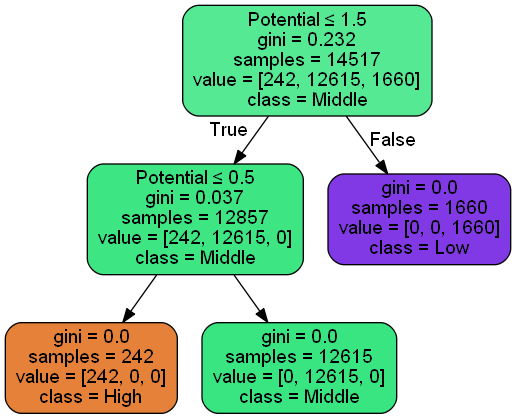

In [48]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 

dot_data = tree.export_graphviz(dtc2, out_file=None,  
                         feature_names=['Value','Age','Overall','Potential','International Reputation','Weak Foot','Skill Moves','Position','Jersey Number','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Work Rate1','Work Rate2'],   
                         class_names=['High','Middle','Low'],    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('example.png')    
Image(graph.create_png()) 

D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


[0 0 0 ... 0 0 2]
[[ 8.18733917e+00  1.96412764e+01  2.25271916e+01  1.09555670e+00
   9.34980271e-02  2.12026077e+00  1.75759135e+00  3.43180648e+00
   2.10111511e+01  4.91082518e+01  5.95476068e+01  5.01952307e+01
   5.21875107e+01  5.14654315e+01  6.18642992e+01  4.91556013e+01
   4.46795334e+01  4.26601475e+01  5.85522388e+01  6.07834963e+01
   6.05999314e+01  5.52813519e+01  3.16881112e+01  5.38076857e+01
   6.03154915e+01  4.14357523e+01  5.14376394e+01  3.81271230e+01
   5.51916281e+01  3.78601818e+01  2.61693258e+01  6.08979242e+01
   4.84884200e+01  5.34175673e+01  4.69392692e+01  2.99615715e+01
   2.56328701e+01  2.35316521e+01  9.41670956e+00  9.55035169e+00
   9.55584148e+00  9.42305713e+00  9.45496655e+00  1.18270715e+00
   1.64676617e+00]
 [ 1.00419753e+01  1.86034568e+01  2.07995062e+01  1.05629630e+00
   9.58024691e-02  1.48987654e+00 -3.48610030e-14  2.00000000e+00
   1.95165432e+01  9.25728395e+00  9.01728395e+00  1.03688889e+01
   1.82720988e+01  8.39703704e+00  9.85

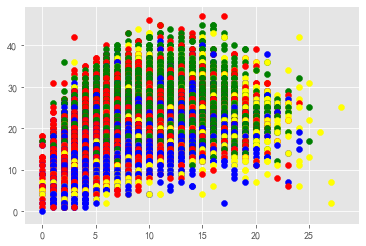

In [49]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn import cluster

estimator=KMeans(n_clusters=4)
res=estimator.fit_predict(df6)
lable_pred=estimator.labels_
centroids=estimator.cluster_centers_
inertia=estimator.inertia_
#print res
print(lable_pred)
print(centroids)
print(inertia)
for i in range(len(df6)):
    if int(lable_pred[i])==0:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='red')
    if int(lable_pred[i])==1:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='yellow')
    if int(lable_pred[i])==2:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='blue')
    if int(lable_pred[i])==3:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='green')
plt.show()

[2 2 2 ... 2 2 0]
[[ 8.20673935e+00  1.74790882e+01  2.07294351e+01  1.04202180e+00
   3.64717542e-02  1.78771060e+00  1.04658077e+00  8.72348860e-01
   1.79284440e+01  3.93990089e+01  2.82202180e+01  5.52558969e+01
   4.77811695e+01  2.75920714e+01  4.40681863e+01  3.07326065e+01
   3.01427156e+01  4.18598612e+01  4.71750248e+01  4.90662042e+01
   4.99050545e+01  4.10666006e+01  2.95678890e+01  4.37296333e+01
   4.28313181e+01  4.52608523e+01  5.27976214e+01  4.67088206e+01
   3.12071358e+01  5.22259663e+01  5.76884044e+01  3.70995045e+01
   3.30782953e+01  3.45052527e+01  4.16023786e+01  5.78632309e+01
   5.98438057e+01  5.78719524e+01  9.45232904e+00  9.48463826e+00
   9.40277502e+00  9.46184341e+00  9.40198216e+00  1.64955401e+00
   1.48424182e+00]
 [ 1.00419753e+01  1.86034568e+01  2.07995062e+01  1.05629630e+00
   9.58024691e-02  1.48987654e+00 -3.48610030e-14  2.00000000e+00
   1.95165432e+01  9.25728395e+00  9.01728395e+00  1.03688889e+01
   1.82720988e+01  8.39703704e+00  9.85

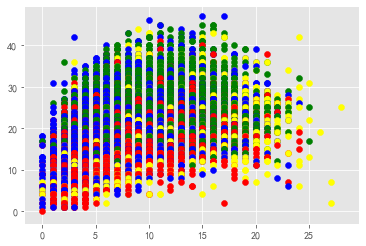

In [50]:
estimator=KMeans(n_clusters=4,init='k-means++', max_iter=60)
res=estimator.fit_predict(df6)
lable_pred=estimator.labels_
centroids=estimator.cluster_centers_
inertia=estimator.inertia_
#print res
print(lable_pred)
print(centroids)
print(inertia)
for i in range(len(df6)):
    if int(lable_pred[i])==0:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='red')
    if int(lable_pred[i])==1:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='yellow')
    if int(lable_pred[i])==2:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='blue')
    if int(lable_pred[i])==3:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='green')
plt.show()

[2 2 2 ... 3 3 1]
[[1.01253012e+01 1.84795181e+01 2.06746988e+01 1.05783133e+00
  7.46987952e-02 1.49879518e+00 0.00000000e+00 2.00000000e+00
  1.82626506e+01 9.44578313e+00 9.06265060e+00 1.02289157e+01
  1.80361446e+01 8.49879518e+00 9.94457831e+00 8.85060241e+00
  1.05903614e+01 1.68240964e+01 1.31084337e+01 2.60602410e+01
  2.68650602e+01 2.47759036e+01 2.95879518e+01 2.74987952e+01
  1.83542169e+01 3.58650602e+01 1.83927711e+01 3.75228916e+01
  9.96385542e+00 1.56168675e+01 1.41012048e+01 9.48915663e+00
  2.78457831e+01 1.40265060e+01 3.23710843e+01 1.22096386e+01
  9.85542169e+00 9.79759036e+00 4.63060241e+01 4.27204819e+01
  5.15349398e+01 5.09060241e+01 4.89710843e+01 2.00000000e+00
  2.00000000e+00]
 [8.49955947e+00 1.82008811e+01 2.10317181e+01 1.04757709e+00
  5.02202643e-02 1.80704846e+00 1.08898678e+00 9.64757709e-01
  1.77629956e+01 4.12334802e+01 2.96740088e+01 5.55533040e+01
  4.89233480e+01 2.83621145e+01 4.55048458e+01 3.20757709e+01
  3.13118943e+01 4.32290749e+01 4.

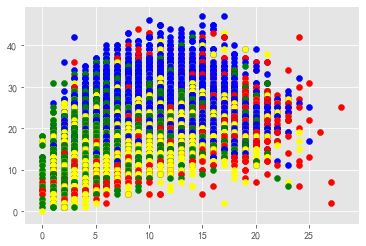

In [51]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=4, batch_size=100, random_state=28)
mbk.fit(df6)
lable_pred=mbk.labels_
centroids=mbk.cluster_centers_
inertia=mbk.inertia_
#print res
print(lable_pred)
print(centroids)
print(inertia)
for i in range(len(df6)):
    if int(lable_pred[i])==0:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='red')
    if int(lable_pred[i])==1:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='yellow')
    if int(lable_pred[i])==2:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='blue')
    if int(lable_pred[i])==3:
        plt.scatter(df6.iloc[i][0],df6.iloc[i][1],color='green')
plt.show()